In [1]:
import pandas as pd

splits = {'train': 'train.csv', 'test': 'test.csv'}
df = pd.read_csv("hf://datasets/osyvokon/pavlick-formality-scores/" + splits["train"])

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274 entries, 0 to 9273
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   domain     9274 non-null   object 
 1   avg_score  9274 non-null   float64
 2   sentence   9274 non-null   object 
dtypes: float64(1), object(2)
memory usage: 217.5+ KB
None
    domain  avg_score                                           sentence
0     news       -0.6  Tang was employed at private-equity firm Fried...
1     news        1.0  San Francisco Mayor Gavin Newsom's withdrawal ...
2  answers       -2.8                   lol nothing worrying about that.
3     news        0.0  She told Price she wanted to join the Police E...
4     news        1.8  The prime minister is keen to use the autumn p...


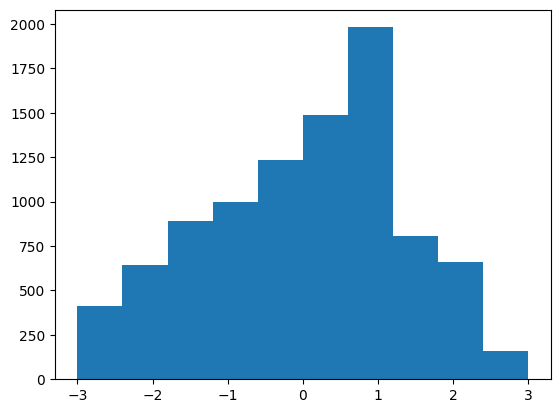

In [2]:
import matplotlib.pyplot as plt

# illustrate spread of avg_score values
plt.hist(df['avg_score'])
plt.show()

In [ ]:
import numpy as np
import json
import matplotlib.pyplot as plt

import gensim.downloader as api
from sklearn.manifold import TSNE

# Load pre-trained word embeddings from gensim library
model = api.load('glove-twitter-25')

# Vectorise the 'sentence' column of the dataframe using the pre-trained word embeddings
sentence_vectors = []
for sentence in df['sentence']:
    sentence_vector = np.zeros(25, dtype=np.float32)
    for word in sentence.split():
        if word in model:
            sentence_vector += model[word]
    sentence_vectors.append(sentence_vector)


[array([ -3.80482   ,   1.549212  ,  -0.99535996,  -4.4875    ,
         0.74943006,  -0.72452486,  -0.34107006,  -4.7638597 ,
         1.1861202 ,  -0.717799  ,   0.65844834,   1.5417238 ,
       -20.999401  ,   0.78306997,   0.53703797,  -2.8269    ,
         3.8893101 ,   0.37004697,   1.4737201 ,  -2.2794201 ,
         1.0381299 ,   1.1835899 ,  -2.757844  ,  -2.8481002 ,
        -1.45512   ], dtype=float32), array([  -3.8476827 ,   14.666244  ,   -0.34653765,   -2.1198497 ,
         -4.6766458 ,   -8.0374155 ,   30.40323   ,  -14.890476  ,
         -7.5644264 ,   -4.370944  ,    5.1883616 ,   10.19879   ,
       -148.4541    ,    5.3995047 ,    2.6730661 ,   -2.7375364 ,
          8.509548  ,   -7.9506154 ,   -1.3788276 ,  -12.635166  ,
         -1.5641848 ,    7.0935144 ,    1.6418992 ,   -8.229311  ,
        -12.619996  ], dtype=float32), array([  1.1673169 ,   3.6700768 ,   0.39708003,   2.4886398 ,
        -2.8575702 ,   0.60594416,   5.21542   ,  -4.31435   ,
        -1.96155

Text(0, 0.5, 't-SNE Dimension 2')

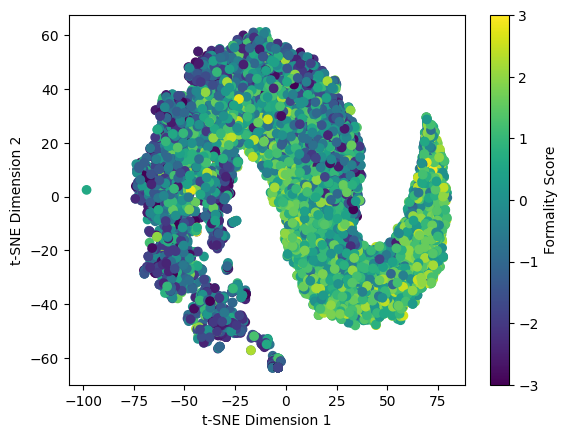

In [5]:
sentence_vectors_array = np.array(sentence_vectors)
# Visualise using t-SNE, colorising based on formality 'avg_score' column
tsne = TSNE(n_components=2, random_state=42)
sentence_vectors_2d = tsne.fit_transform(sentence_vectors_array)

plt.scatter(sentence_vectors_2d[:, 0], sentence_vectors_2d[:, 1], c=df['avg_score'], cmap='viridis')
plt.colorbar(label='Formality Score')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
